In [87]:
from fastai import *
from fastai.vision import *

In [117]:
folder = 'b747'
file = 'b747.txt'

In [119]:
folder = 'b777'
file = 'b777.txt'

In [123]:
folder = 'a380'
file = 'a380.txt'

In [124]:
path = Path('data/airplane')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [98]:
path.ls()

[PosixPath('data/airplane/b747'),
 PosixPath('data/airplane/a380'),
 PosixPath('data/airplane/b777'),
 PosixPath('data/airplane/b747.txt'),
 PosixPath('data/airplane/a380.txt'),
 PosixPath('data/airplane/b777.txt')]

In [126]:
classes = ['a380','b747','b777']

In [125]:
download_images(path/file, dest, max_pics=200)

In [127]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

a380


cannot identify image file <_io.BufferedReader name='data/airplane/a380/00000016.jpg'>
cannot identify image file <_io.BufferedReader name='data/airplane/a380/00000034.jpg'>
cannot identify image file <_io.BufferedReader name='data/airplane/a380/00000061.jpg'>
cannot identify image file <_io.BufferedReader name='data/airplane/a380/00000084.jpg'>
cannot identify image file <_io.BufferedReader name='data/airplane/a380/00000093.jpg'>


/opt/conda/lib/python3.6/site-packages/PIL/Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/airplane/a380/00000155.jpg'>
cannot identify image file <_io.BufferedReader name='data/airplane/a380/00000174.png'>
cannot identify image file <_io.BufferedReader name='data/airplane/a380/00000197.jpg'>
b747


b777


In [128]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [129]:
data.classes

['a380', 'b747', 'b777']

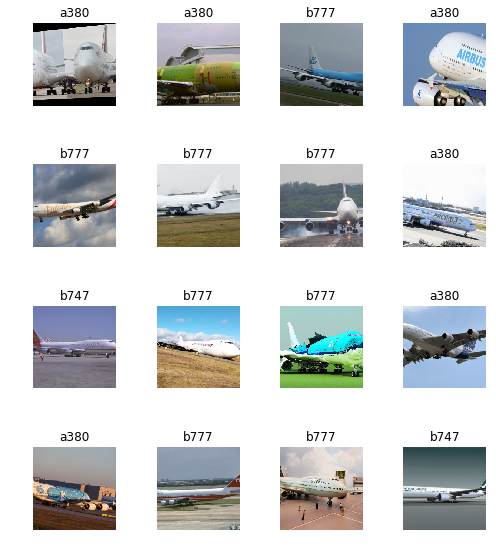

In [131]:
data.show_batch(rows=4, figsize=(7,8))

In [132]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['a380', 'b747', 'b777'], 3, 547, 136)

In [153]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/crestle/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 92221028.31it/s]


In [154]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.445517,1.110613,0.588235,00:10
1,1.346306,1.346148,0.492647,00:07
2,1.205930,1.439395,0.566176,00:07
3,1.111152,1.399051,0.573529,00:07


In [155]:
learn.save('stage-1')

In [156]:
learn.unfreeze()

In [157]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


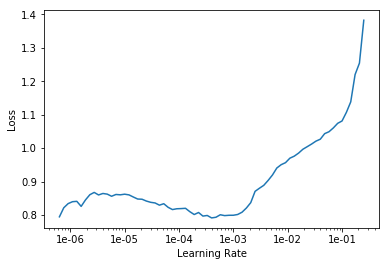

In [158]:
learn.recorder.plot()

In [160]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.820211,1.357409,0.492647,00:08
1,0.729865,1.325331,0.492647,00:08


In [161]:
learn.save('stage-2')

In [142]:
learn.load('stage-2');

In [143]:
interp = ClassificationInterpretation.from_learner(learn)

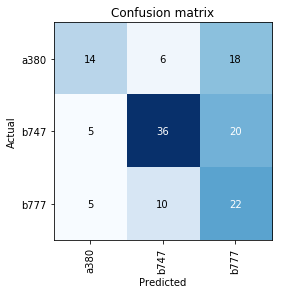

In [144]:
interp.plot_confusion_matrix()

In [145]:
from fastai.widgets import *

In [147]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [148]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [149]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [150]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [151]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [162]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())